In [6]:
# Install necessary libraries
!pip install streamlit -q
!pip install pyngrok
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import streamlit as st
from pyngrok import ngrok
# Load the dataset
df = pd.read_csv('/kaggle/salary_prediction_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None
        

**Part 2: Data Preprocessing and Exploratory Data Analysis (EDA)**

In this section, we will clean the data, handle missing values and outliers, and perform exploratory data analysis to understand the relationships between variables.

Missing Values:
 Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

Summary Statistics for Numerical Columns:
         Experience          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean     14.771000    42.377000  105558.404239
std       8.341111    13.609412   28256.972075
min       1.000000    20.000000   33510.510669
25%       7.000000    30.000000   85032.141517
50%      15.000000    43.000000  104314.518315
75%      22.000000    55.000000  126804.047524
max      29.000000    64.000000  193016.602150

Summary for Categorical Columns:
           Education  Location Job_Title Gender
count          1000      1000      1000   1000
unique            4         3         4      2
top     High School  Suburban  Director   Male
freq            255       345       275    516


/tmp/ipython-input-21-1644423286.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-21-1644423286.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

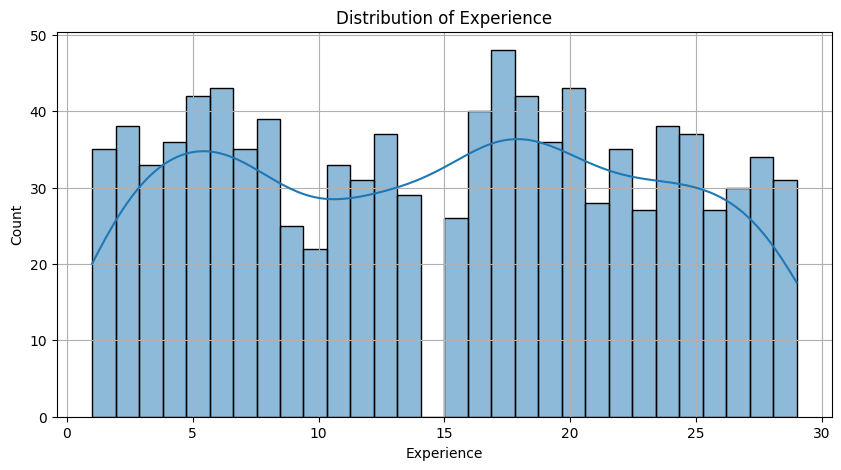

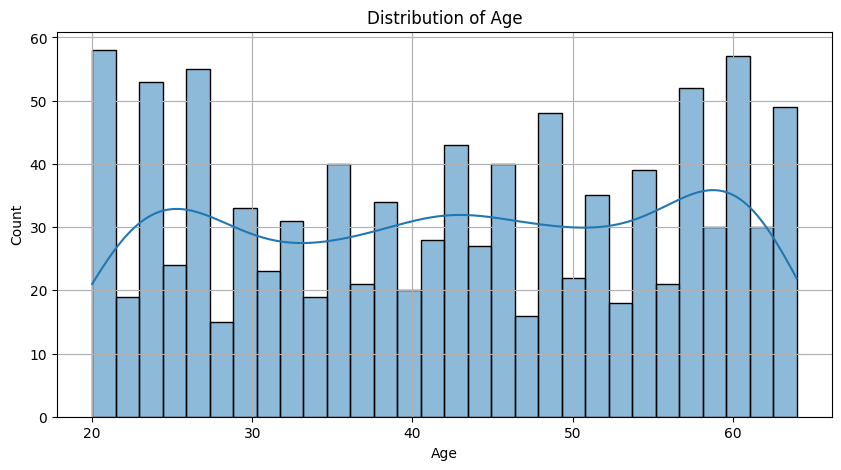

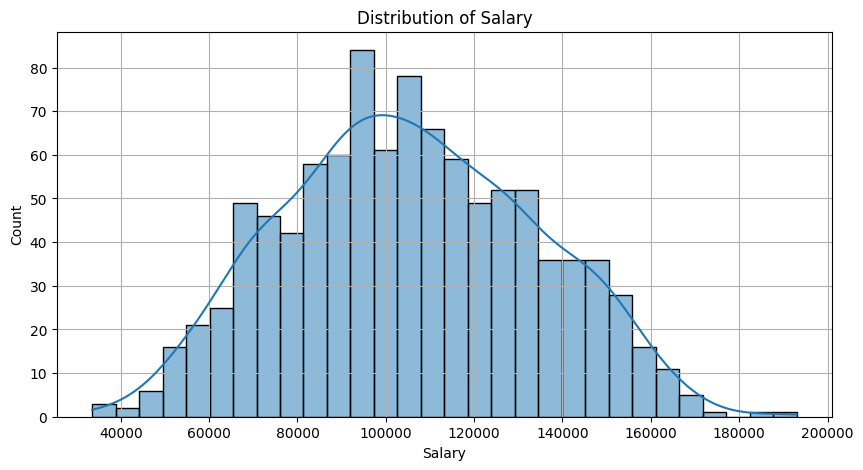

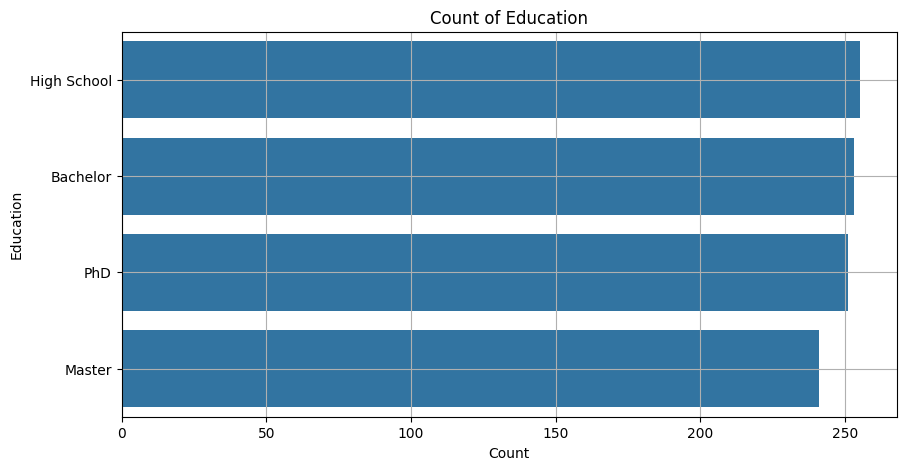

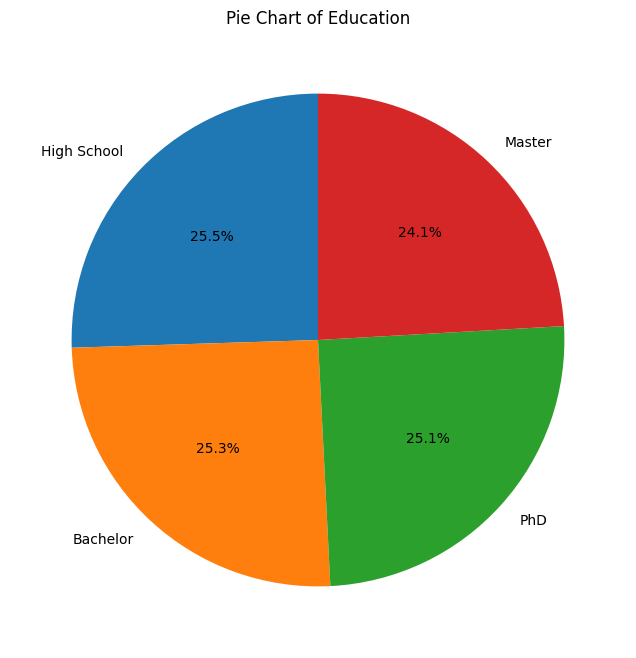

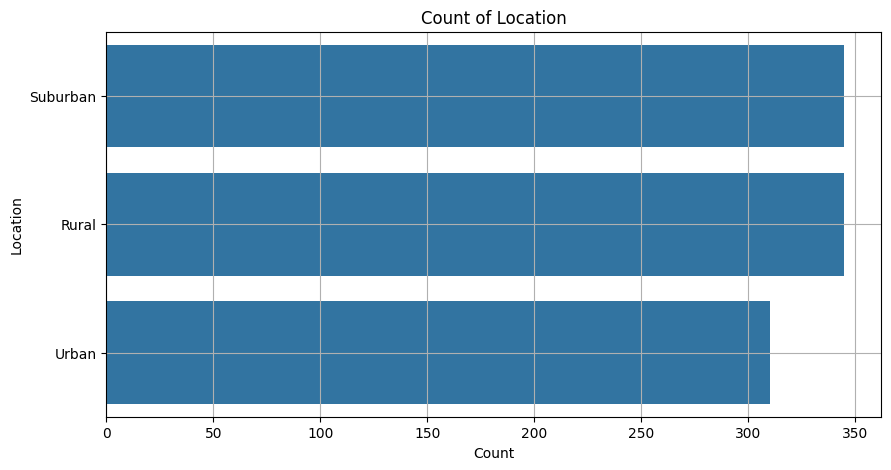

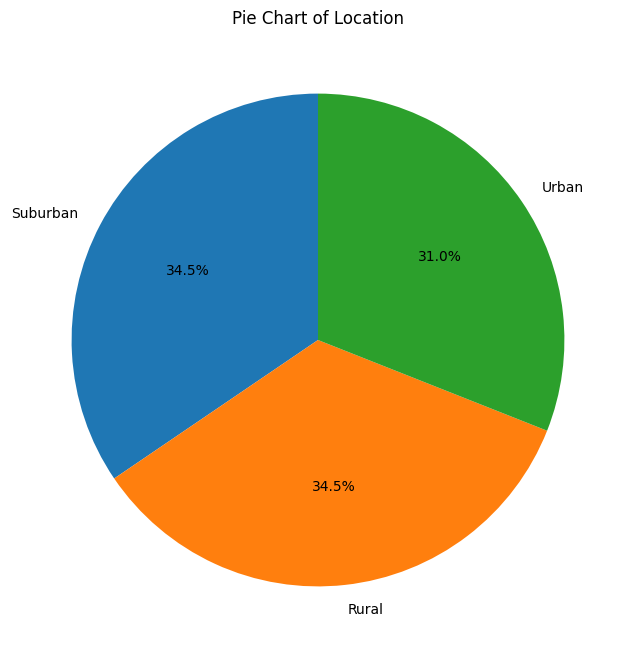

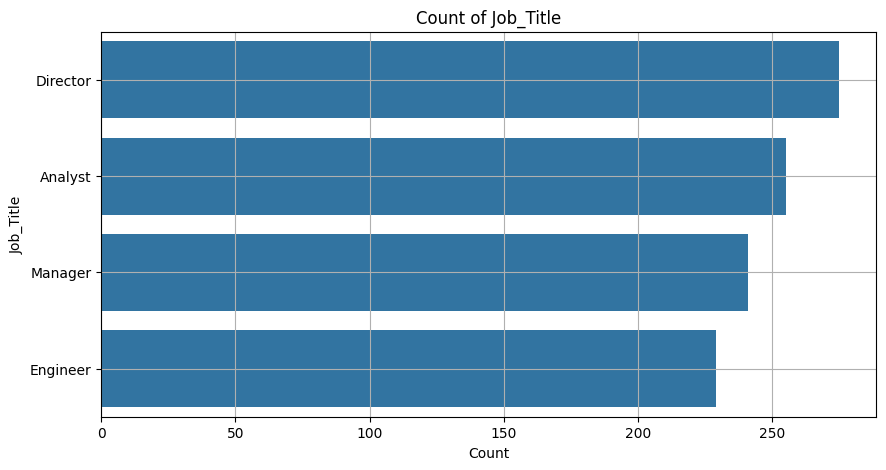

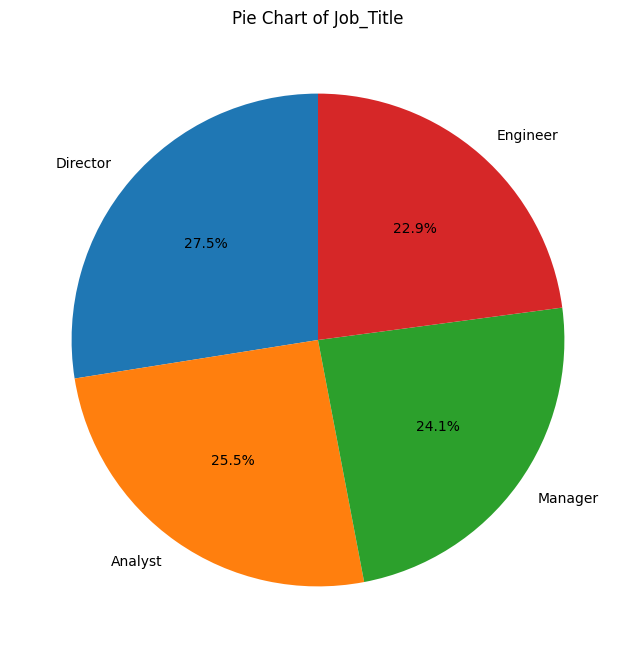

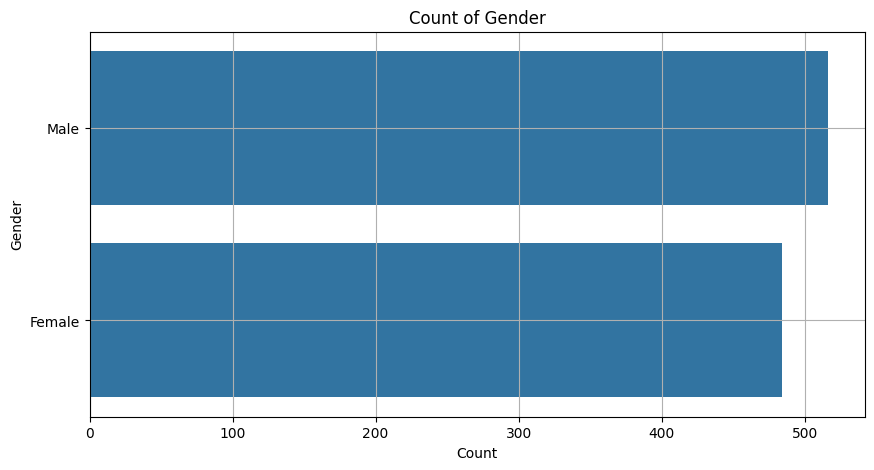

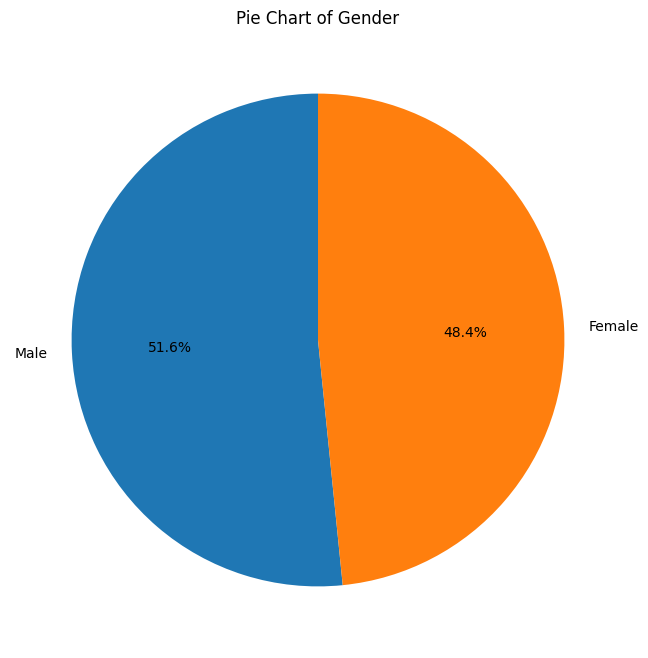

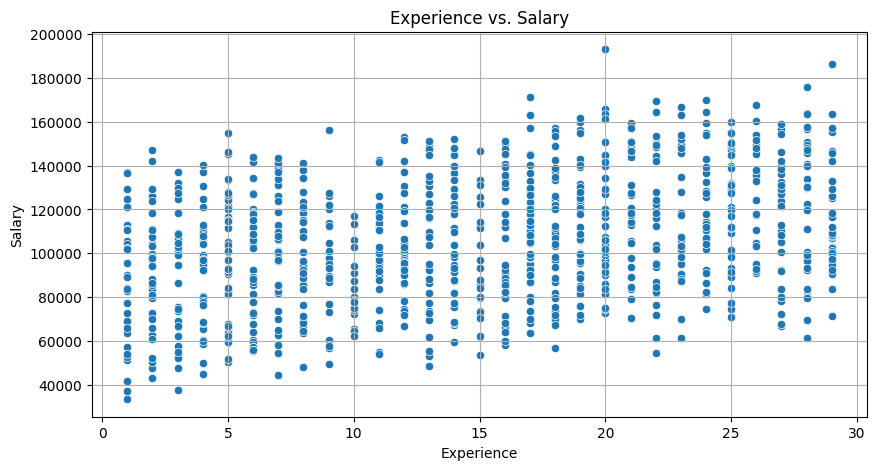

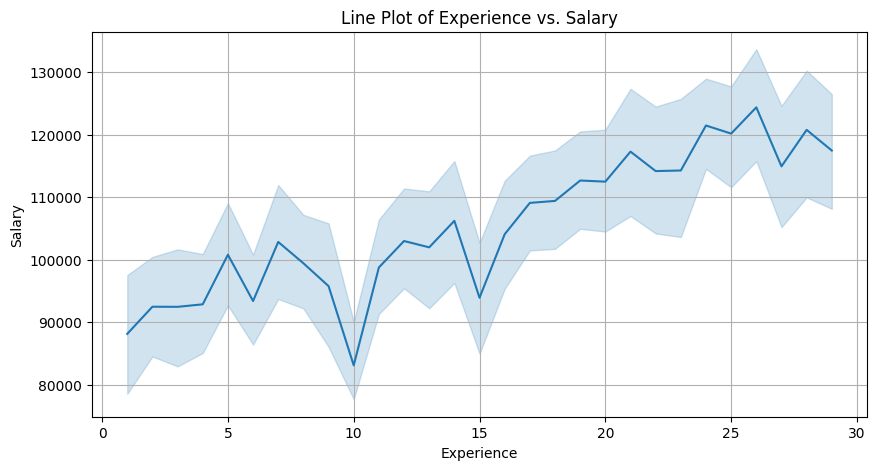

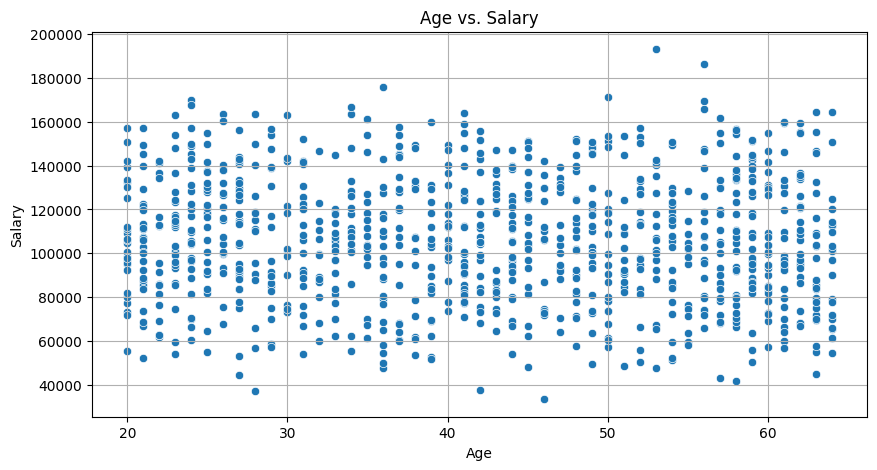

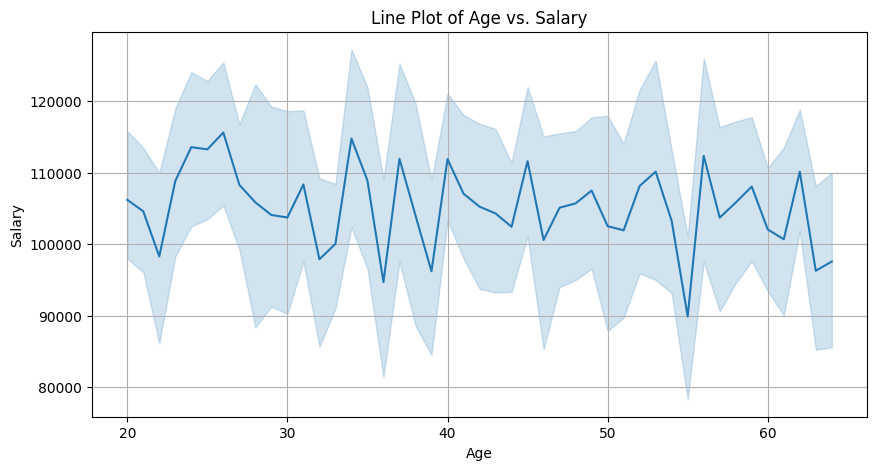

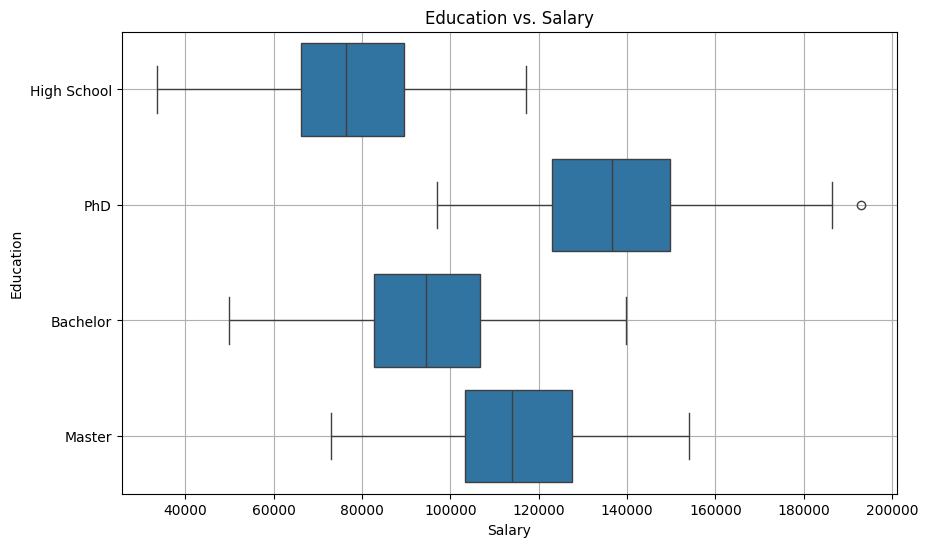

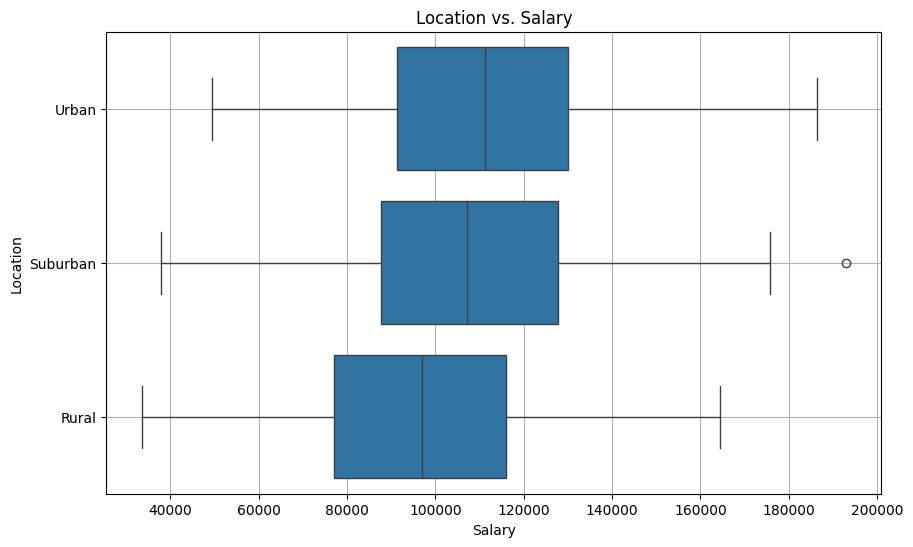

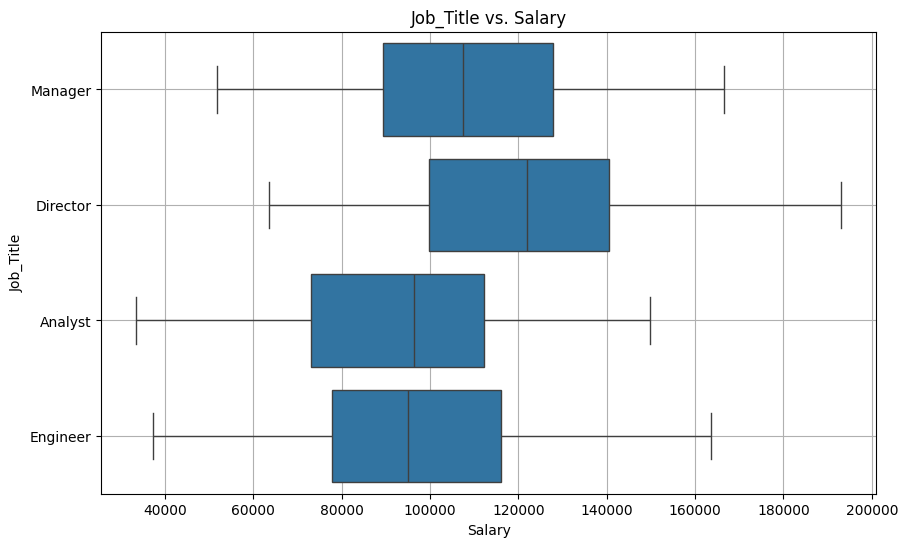

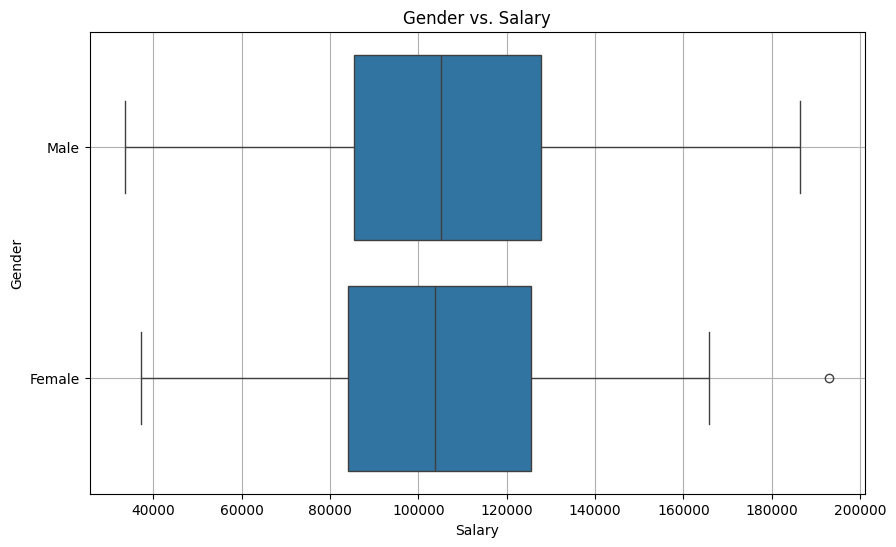

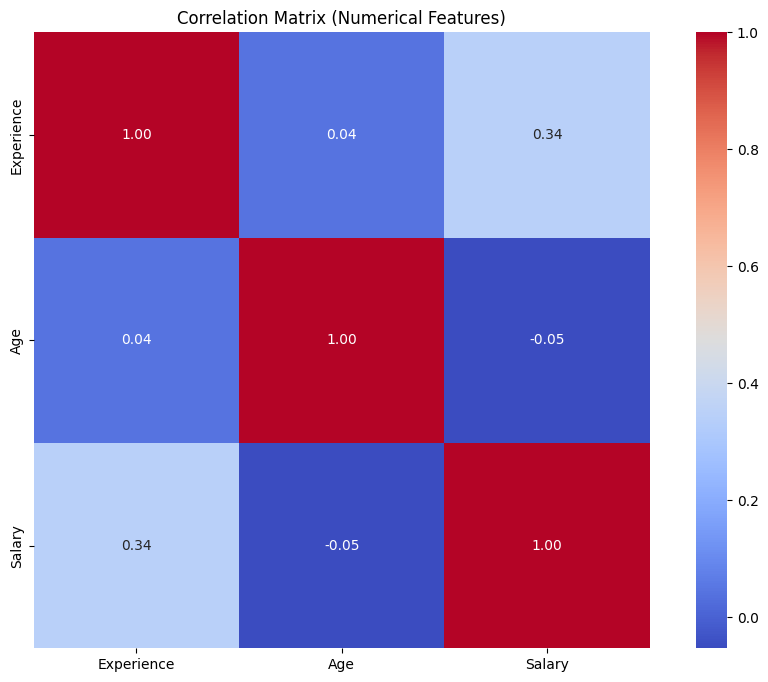

In [21]:
print("Missing Values:\n", df.isnull().sum())

# Handle missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Summary Statistics Table
print("\nSummary Statistics for Numerical Columns:\n", df.describe())
print("\nSummary for Categorical Columns:\n", df.describe(include='object'))

# ------------------------------
# Univariate Analysis
# ------------------------------

# Numerical: Histograms
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

# Categorical: Countplots & Pie Charts
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel("")
    plt.show()

# ------------------------------
# Bivariate Analysis
# ------------------------------

# Numerical vs Target (e.g., Salary)
for col in df.select_dtypes(include=np.number).columns:
    if col != 'Salary':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[col], y=df['Salary'])
        plt.title(f'{col} vs. Salary')
        plt.xlabel(col)
        plt.ylabel('Salary')
        plt.grid(True)
        plt.show()

        # Line Plot
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=df[col].sort_values(), y=df['Salary'].sort_values())
        plt.title(f'Line Plot of {col} vs. Salary')
        plt.xlabel(col)
        plt.ylabel("Salary")
        plt.grid(True)
        plt.show()

# Categorical vs Target (e.g., Salary)
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Salary'], y=df[col])
    plt.title(f'{col} vs. Salary')
    plt.xlabel('Salary')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# ------------------------------
# Correlation Matrix for Numerical Columns
# ------------------------------
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

**Part 3: Feature Engineering and Data Preparation**

We will define our features and the target variable, and create preprocessing pipelines for numerical and categorical variables.

In [13]:
# Define features (X) and target (y)
X = df.drop('Salary', axis=1)
y = df['Salary']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**Part 4: Machine Learning Model Building and Evaluation**

Now, we will build and evaluate several regression models.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 105308.125571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

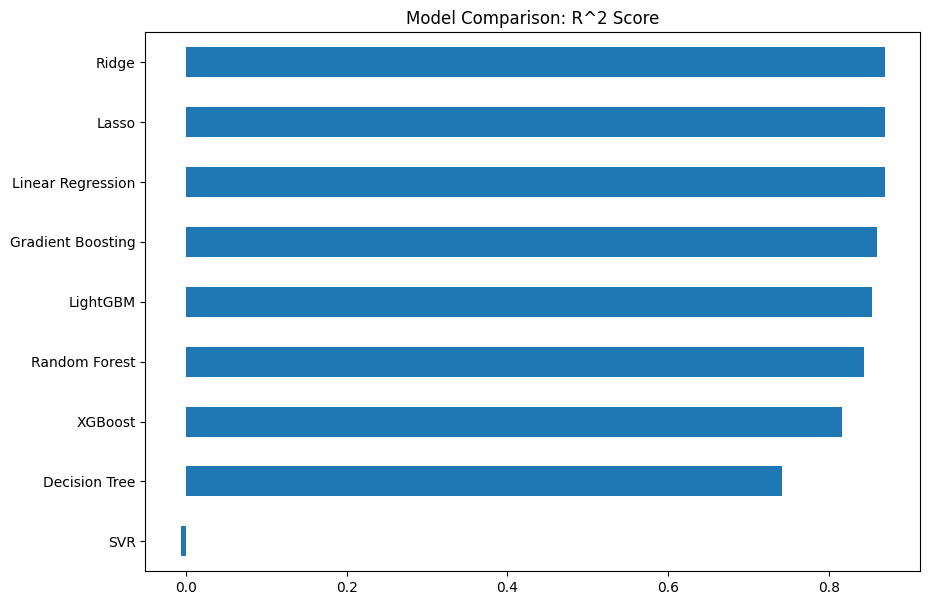

Best Model: Ridge
Best Parameters: {'regressor__alpha': 1.0}
Final MAE: 8156.752761060192
Final MSE: 105820837.06031786
Final RMSE: 10286.925539747912
Final R^2: 0.8704012302490083


['salary_prediction_model.pkl']

In [16]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'SVR': SVR()
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate each model
results = {}
for name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, mse, rmse, r2]

# Display the results
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R^2']).T
print(results_df)

# Visualize the model comparison
results_df['R^2'].sort_values().plot(kind='barh', figsize=(10, 7))
plt.title('Model Comparison: R^2 Score')
plt.show()

# Choose the best model based on R^2 score
best_model_name = results_df['R^2'].idxmax()
best_model = models[best_model_name]

# Define the parameter grid for GridSearchCV based on the best model
if best_model_name == 'Gradient Boosting':
    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__max_depth': [3, 4]
    }
elif best_model_name == 'Ridge': # Example for another model
     param_grid = {
         'regressor__alpha': [0.1, 1.0, 10.0]
     }
# Add elif blocks for other models if you want to tune them as well
else:
    param_grid = {} # No tuning for other models

# Create the pipeline for the best model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', best_model)])


# Create the GridSearchCV object only if param_grid is not empty
if param_grid:
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best model
    final_model = grid_search.best_estimator_

    # Evaluate the final model
    y_pred_final = final_model.predict(X_test)
    final_mae = mean_absolute_error(y_test, y_pred_final)
    final_mse = mean_squared_error(y_test, y_pred_final)
    final_rmse = np.sqrt(final_mse)
    final_r2 = r2_score(y_test, y_pred_final)

    print(f"Best Model: {best_model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Final MAE: {final_mae}")
    print(f"Final MSE: {final_mse}")
    print(f"Final RMSE: {final_rmse}")
    print(f"Final R^2: {final_r2}")
else:
    final_model = pipeline # Use the best model without tuning
    y_pred_final = final_model.predict(X_test)
    final_mae = mean_absolute_error(y_test, y_pred_final)
    final_mse = mean_squared_error(y_test, y_pred_final)
    final_rmse = np.sqrt(final_mse)
    final_r2 = r2_score(y_test, y_pred_final)

    print(f"Best Model: {best_model_name} (No tuning)")
    print(f"Final MAE: {final_mae}")
    print(f"Final MSE: {final_mse}")
    print(f"Final RMSE: {final_rmse}")
    print(f"Final R^2: {final_r2}")


# Save the final model
joblib.dump(final_model, 'salary_prediction_model.pkl')

**Part 6: Building and Deploying the Streamlit Web App**

Finally, we will create the Streamlit application file and deploy it using Ngrok.

In [24]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the trained model and the original data for plotting
model = joblib.load('salary_prediction_model.pkl')
# Assuming the original data is available at this path in the deployed environment
# If not, you might need to include the data file with your Streamlit app
try:
    df = pd.read_csv('/kaggle/salary_prediction_data.csv')
except FileNotFoundError:
    st.error("Data file not found. Please ensure 'salary_prediction_data.csv' is in the correct directory.")
    df = None # Handle case where data is not found

# Set the page configuration
st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")

# App title
st.title("💼 Employee Salary Prediction")
st.markdown("Predict an employee's salary based on their professional profile.")

# --- Sidebar for input ---
st.sidebar.header("Input Employee Details")

# Input fields
education = st.sidebar.selectbox("Education", ['High School', 'Bachelor', 'Master', 'PhD'])
experience = st.sidebar.slider("Years of Experience", 0, 30, 5)
location = st.sidebar.selectbox("Location", ['Urban', 'Suburban', 'Rural'])
job_title = st.sidebar.selectbox("Job Title", ['Manager', 'Director', 'Analyst', 'Engineer'])
age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", ['Male', 'Female'])

# Create a dataframe from the inputs
input_data = pd.DataFrame({
    'Education': [education],
    'Experience': [experience],
    'Location': [location],
    'Job_Title': [job_title],
    'Age': [age],
    'Gender': [gender]
})

# Prediction
if st.sidebar.button("Predict Salary"):
    # Ensure the model is loaded before predicting
    if model:
        prediction = model.predict(input_data)
        st.success(f"Predicted Salary: ${prediction[0]:,.2f}")
    else:
        st.error("Model not loaded. Cannot make prediction.")


# --- Main Page Content ---
st.header("Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type=["csv"])
if uploaded_file is not None:
    try:
        batch_df = pd.read_csv(uploaded_file)
        # Ensure the batch file has the correct columns
        required_cols = ['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender']
        if all(col in batch_df.columns for col in required_cols):
             if model:
                predictions = model.predict(batch_df[required_cols])
                batch_df['Predicted_Salary'] = predictions
                st.dataframe(batch_df)
             else:
                 st.error("Model not loaded. Cannot make batch prediction.")
        else:
            st.error(f"The uploaded CSV must contain the following columns: {', '.join(required_cols)}")
    except Exception as e:
        st.error(f"An error occurred: {e}")

st.markdown("---") # Add a horizontal rule for separation

st.markdown("### How it Works")
st.write("This web application utilizes a machine learning model to predict employee salaries based on the provided input features. The model was trained on a dataset of employee information and has learned the relationships between different attributes and their corresponding salaries.")

st.markdown("### Exploratory Data Analysis (EDA) Insights")
st.write("Here are some insights from the data:")

if df is not None:
    # Plot: Experience vs. Salary
    st.subheader("Experience vs. Salary")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=df['Experience'], y=df['Salary'], ax=ax)
    ax.set_title('Experience vs. Salary')
    ax.set_xlabel('Years of Experience')
    ax.set_ylabel('Salary')
    st.pyplot(fig)

    # Plot: Age vs. Salary
    st.subheader("Age vs. Salary")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=df['Age'], y=df['Salary'], ax=ax)
    ax.set_title('Age vs. Salary')
    ax.set_xlabel('Age')
    ax.set_ylabel('Salary')
    st.pyplot(fig)

st.markdown("---") # Add a horizontal rule for separation

st.markdown("### Machine Learning Model Details")
st.write(f"The best performing model used for prediction is: **Ridge Regression**") # Update this if the best model changes

# You could add more details about the model if needed, e.g., best parameters
# st.write(f"Best Parameters: {grid_search.best_params_}") # This would require passing best_params_ to the app or reloading it

st.markdown("### Model Performance")
st.write("The model was evaluated using the following metrics on the test data:")
st.write("- **R-squared (R²):** A measure of how well the model explains the variance in the salary data.")
st.write("- **Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual salaries.")
# You could display the actual values if you pass them to the app or reload them
# st.write(f"  - Final R²: {final_r2:.4f}")
# st.write(f"  - Final MAE: {final_mae:.2f}")

Overwriting app.py


In [25]:
!ngrok authtoken "2zxOc02n0pkFmaZFwZmH91i8VZ4_4Dp8Lccs5rshC1sHpiyFN"

# Run the streamlit app
!streamlit run app.py &>/dev/null &

public_url = ngrok.connect(addr='8501')
print(f"Streamlit App URL: {public_url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit App URL: NgrokTunnel: "https://d40ca0dcf22d.ngrok-free.app" -> "http://localhost:8501"
